In [1]:
import pandas as pd
import matplotlib

In [2]:
data = "data/AEX.csv"
df = pd.read_csv(data)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-05,756.859985,757.880005,753.270020,755.760010,755.760010,57300
1,2023-04-06,757.450012,760.969971,756.719971,759.840027,759.840027,62200
2,2023-04-11,764.750000,765.760010,762.570007,763.320007,763.320007,58900
3,2023-04-12,761.770020,769.140015,758.229980,759.539978,759.539978,62400
4,2023-04-13,758.349976,761.020020,757.020020,760.570007,760.570007,53700
...,...,...,...,...,...,...,...
249,2024-03-27,878.849976,881.200012,878.549988,879.099976,879.099976,45265100
250,2024-03-28,881.849976,883.729980,881.049988,881.780029,881.780029,57532500
251,2024-04-02,888.539978,892.539978,880.320007,881.419983,881.419983,58447900
252,2024-04-03,883.270020,884.510010,879.469971,884.049988,884.049988,50944300


(<Axes: >, <Axes: >)

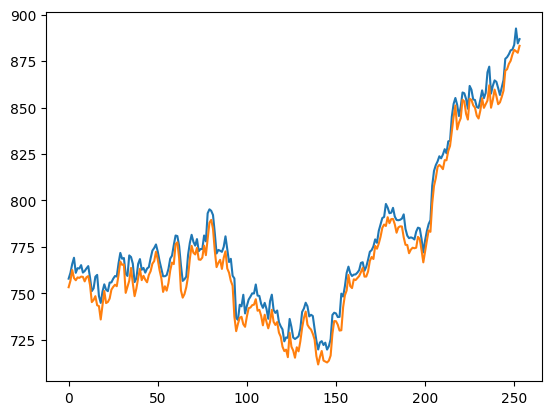

In [4]:
df["High"].plot(), df["Low"].plot()

Esto me sirve para el render

In [6]:
type(df["High"])

pandas.core.series.Series

In [ ]:
def render():
    
    # Si el gráfico no ha sido creado todavía, crearlo y mostrar el primer punto
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("Estado actual del mercado")
    ax.set_xlabel("Paso")
    ax.set_ylabel("Precio")
    ax.plot([0], current_data["High"], 'ro')  # Crear un punto rojo
    plot_created = True


In [12]:
import matplotlib.pyplot as plt

760.969971
765.76001
769.140015
761.02002
763.51001


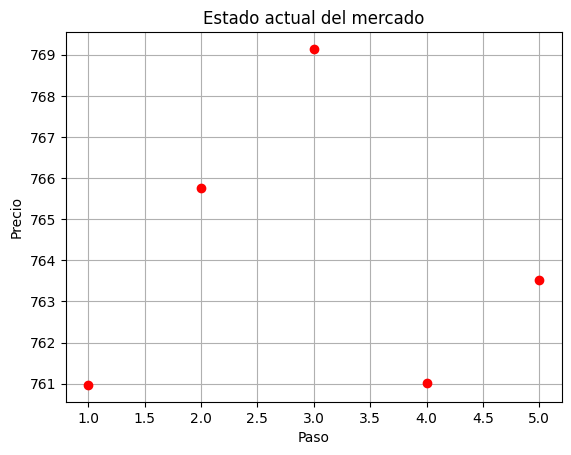

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(1,6):
    print(df["High"][i])
    ax.set_title("Estado actual del mercado")
    ax.set_xlabel("Paso")
    ax.set_ylabel("Precio")
    ax.grid()
    ax.plot([i], df["High"][i], 'ro')  # Crear un punto rojo
    

# Shares implementation

In [71]:
import datetime

In [72]:
datetime.date.today().strftime("%d/%m/%Y")

'08/04/2024'

In [73]:
share = {
    "name": "AEX",
    "buy_date": "dia4",
    "buy_value": 10,
    "ID": "_".join(["AEX_" + "dia4"])
}
print(share)

{'name': 'AEX', 'buy_date': 'dia4', 'buy_value': 10, 'ID': 'AEX_dia4'}


In [74]:
share2 = {
    "name": "AEX",
    "buy_date": "dia1",
    "buy_value": 20,
    "ID": "_".join(["AEX_" + "dia1"])
}
share2

{'name': 'AEX', 'buy_date': 'dia1', 'buy_value': 20, 'ID': 'AEX_dia1'}

In [75]:
share3 = {
    "name": "AEX",
    "buy_date": "dia2",
    "buy_value": 40,
    "ID": "_".join(["AEX_" + "dia2"])
}
share3

{'name': 'AEX', 'buy_date': 'dia2', 'buy_value': 40, 'ID': 'AEX_dia2'}

In [76]:
share4 = {
    "name": "AEX",
    "buy_date": "hoy",
    "buy_value": 5,
    "ID": "_".join(["AEX_" + "hoy"])
}
share4

{'name': 'AEX', 'buy_date': 'hoy', 'buy_value': 5, 'ID': 'AEX_hoy'}

In [77]:
share1 = share

In [78]:
shares = [share1, share2, share3, share4]
shares

[{'name': 'AEX', 'buy_date': 'dia4', 'buy_value': 10, 'ID': 'AEX_dia4'},
 {'name': 'AEX', 'buy_date': 'dia1', 'buy_value': 20, 'ID': 'AEX_dia1'},
 {'name': 'AEX', 'buy_date': 'dia2', 'buy_value': 40, 'ID': 'AEX_dia2'},
 {'name': 'AEX', 'buy_date': 'hoy', 'buy_value': 5, 'ID': 'AEX_hoy'}]

In [79]:
for share in shares:
    print(share.get("buy_value"))

10
20
40
5


In [80]:
current_price = 15
price = 10

In [81]:
price < current_price

True

In [82]:
def sell_available():
    max_profit = float("-inf")
    for i, share in enumerate(shares):
        buy_price = share.get("buy_value")
        profit = current_price - buy_price
        if profit > max_profit:
            max_profit = profit
            max_profit_index = i
        # if buy_price < current_price:
        #     print(f'Se puede vender la acción {share["name"]} '
        #             f'comprada el día {share["buy_date"]} '
        #             f'por {share["buy_value"]}')
    return max_profit, max_profit_index
            

In [83]:
max_profit, max_profit_index = sell_available()

In [84]:
# Uso de la función
if max_profit_index is not None and max_profit_index < len(shares):
    print(f"La acción con mayor beneficio es la acción {shares[max_profit_index]['ID']} con un beneficio de {max_profit}")
else:
    print("No hay acciones disponibles para vender.")

La acción con mayor beneficio es la acción AEX_hoy con un beneficio de 10


In [86]:
max_profit_index

3

In [87]:
shares[3]["b"]

{'name': 'AEX', 'buy_date': 'hoy', 'buy_value': 5, 'ID': 'AEX_hoy'}

# Fechas


In [99]:
def change_format(cad: str) -> str:
    date = datetime.datetime.strptime(cad, "%Y-%m-%d").strftime("%d-%m-%Y")
    date_split = date.split("-")
    
    return "-".join([d.lstrip("0") for d in date_split])

def str_to_date(date_str: str) -> datetime.datetime:
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

In [95]:
date = str_to_date("2023-04-06")
date

datetime.datetime(2023, 4, 6, 0, 0)

In [100]:
change_format("2023-04-06")

'6-4-2023'